#### Altroconsumo (https://www.altroconsumo.it/hi-tech/televisori/news/nuovo-standard-tv)

La nuova legge ha però già affrontato i primi step: dal 1° luglio 2016, infatti, i produttori non possono più immettere sul mercato televisori sprovvisti del nuovo standard di trasmissione o senza il codec H265/HEVC. Dal 1° gennaio 2017 anche i rivenditori si sono dovuti adeguare, non potendo di fatto più vendere i "vecchi" televisori. La legge, però, ha già fatto un passo indietro: probabilmente per tanti rivenditori disfarsi dei televisori "fuori legge" entro il 2016 era davvero ambizioso, così la normativa ha avuto un'integrazione. È stata quindi introdotta la possibilità ai negozi di commercializzare le TV con il digitale terrestre DVB-T, a patto che queste vengano vendute abbinate a un decoder DVB-T2 con codec HEVC

Dal primo luglio è scattata la prima scadenza, cioè il divieto per i produttori di immettere queste televisioni sul mercato italiano, mentre dal prossimo 1 gennaio 2017 questi apparecchi saranno illegali in Italia



#### Cosa cercare
- televisori non Dvbt-2
- televisori non Hevc

#### Riferimenti interessanti
- https://www.altroconsumo.it/hi-tech/televisori/news/nuovo-standard-tv 
- http://www.dday.it/redazione/20425/la-lista-dei-tv-future-proof-secondo-la-legge-dal-1-gennaio-2017-si-potranno-vendere-solo-questi/3/hisense

## Librerie

In [1]:
import sys
sys.path.append("./lib/python2.7/site-packages/")
from bs4 import BeautifulSoup
import urllib
import requests
import os
import subprocess
import time
import datetime

# activate mongodb
import pymongo
from pymongo import MongoClient
client = MongoClient()
db = client.MonitoraggioTV
#client.drop_database("MonitoraggioTV")

## Extract data

In [3]:
def get_value(url,selector,keyword,shop):
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data, 'lxml')
    numero_prodotti=(soup.select(selector)[0].text)
    posts = db.posts
    
    if shop=="SUBITO.IT":
        numero_prodotti = numero_prodotti.split(",")[1].replace("\n","").replace("u'","").replace(" ","")
    
    if shop=="eprice.it":
        numero_prodotti=int(numero_prodotti.split(" articoli")[0].replace("(","").replace(" ",""))
        
    if shop=="kijiji.it":
        try:
            numero_prodotti=int(numero_prodotti.split(" Annunci")[0].replace(" ",""))
        except:
            pass
        
    print keyword + " " + str(numero_prodotti)
    post_data = {
        'date': str(datetime.datetime.now().strftime("%d/%m/%y")),
        'url': url,
        'risultato': numero_prodotti,
        'keyword':keyword,
        'shop': shop
    }
    if not posts.find_one(post_data ):
        result = posts.insert_one(post_data)    

### Kijiji.it

In [149]:
shop="kijiji.it"
selector="body > div.content.left-rail.srp > div.main-container > div.main > div.srp-hed > div > h2"

url="https://www.kijiji.it/dvb-t2/"
keyword="DVB-T2"
get_value(url,selector,keyword,shop)

url="https://www.kijiji.it/dvb-t/"
keyword="DVB-T"
get_value(url,selector,keyword,shop)

url="https://www.kijiji.it/hevc/"
keyword="HEVC"
get_value(url,selector,keyword,shop)

url="https://www.kijiji.it/dvb-t2+hevc"
keyword="DVB-T2 HEVC"
get_value(url,selector,keyword,shop)

DVB-T2 40
DVB-T 266
HEVC 1
DVB-T2 HEVC 0


### PREZZO FORTE

In [83]:
shop="PREZZOFORTE"
selector="#col_prodotti_numero > span.lista_prodotti_numero_prodotti"

url="https://www.prezzoforte.it/advanced_search_result.php?keywords=dvb-t"
keyword="DVB-T"
get_value(url,selector,keyword,shop)

url="https://www.prezzoforte.it/advanced_search_result.php?keywords=dvb-t2"
keyword="DVB-T2"
get_value(url,selector,keyword,shop)

url="https://www.prezzoforte.it/advanced_search_result.php?keywords=hevc"
keyword="HEVC"
get_value(url,selector,keyword,shop)

url="https://www.prezzoforte.it/advanced_search_result.php?keywords=dvb-t2+hevc"
keyword="DVB-T2 HEVC"
get_value(url,selector,keyword,shop)

DVB-T 89
DVB-T2 82
HEVC 37
DVB-T2 HEVC 21


## Euronics

In [6]:
selector="#productList > div:nth-of-type(1) > section > div > b"
shop="EURONICS"

url="https://www.euronics.it/acquistaonline/tv-led/cat110016/"
keyword="Tutti televisori"
get_value(url,selector,keyword,shop)

keyword="DVB-T2"    
url="https://www.euronics.it/acquistaonline/tv-led/cat110016/?q="+keyword
get_value(url,selector,keyword,shop)

keyword="DVB-T"    
url="https://www.euronics.it/acquistaonline/tv-led/cat110016/?q="+keyword
get_value(url,selector,keyword,shop)

Tutti televisori 197
DVB-T2 192
DVB-T 2


## Aliexpress

In [84]:
url="https://it.aliexpress.com/wholesale?spm=a2g0y.search0104.1.1.kasRbE&SearchText=dvb-t2"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'lxml')

numero_prodotti=(soup.select('#we-wholesale-search-list > div.bread-block-wrap > div > div > div.search-result > p > strong')[0].text)
posts = db.posts

post_data = {
    'date': str(datetime.datetime.now().strftime("%d/%m/%y")),
    'url': url,
    'risultato': numero_prodotti,
    'keyword':"DVB-T2",
    'shop': "Aliexpress"
}

print post_data
if not posts.find_one(post_data ):
    result = posts.insert_one(post_data)

url="https://it.aliexpress.com/wholesale?catId=0&SearchText=dvb-t"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'lxml')
numero_prodotti=(soup.select('#we-wholesale-search-list > div.bread-block-wrap > div > div > div.search-result > p > strong')[0].text)

post_data = {
    'shop': "Aliexpress",
    'date': str(datetime.datetime.now().strftime("%d/%m/%y")),
    'url': url,
    'risultato': numero_prodotti,
    'keyword':"DVB-T"
}

print post_data
if not posts.find_one(post_data ):
    result = posts.insert_one(post_data)    
    
url="https://it.aliexpress.com/wholesale?catId=0&initiative_id=SB_20171129054255&SearchText=dvb-t2++hevc"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'lxml')
numero_prodotti=(soup.select('#we-wholesale-search-list > div.bread-block-wrap > div > div > div.search-result > p > strong')[0].text)

post_data = {
    'shop': "Aliexpress",
    'date': str(datetime.datetime.now().strftime("%d/%m/%y")),
    'url': url,
    'risultato': numero_prodotti,
    'keyword':"DVB-T2 HEVC"
}

print post_data
if not posts.find_one(post_data ):
    result = posts.insert_one(post_data)    

    
url="https://it.aliexpress.com/wholesale?catId=0&SearchText=hevc"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'lxml')
numero_prodotti=(soup.select('#we-wholesale-search-list > div.bread-block-wrap > div > div > div.search-result > p > strong')[0].text)

post_data = {
    'shop': "Aliexpress",
    'date': str(datetime.datetime.now().strftime("%d/%m/%y")),
    'url': url,
    'risultato': numero_prodotti,
    'keyword':"HEVC"
}

print post_data
if not posts.find_one(post_data ):
    result = posts.insert_one(post_data)

{'date': '30/11/17', 'url': 'https://it.aliexpress.com/wholesale?spm=a2g0y.search0104.1.1.kasRbE&SearchText=dvb-t2', 'shop': 'Aliexpress', 'keyword': 'DVB-T2', 'risultato': u'2,017'}
{'shop': 'Aliexpress', 'date': '30/11/17', 'keyword': 'DVB-T', 'url': 'https://it.aliexpress.com/wholesale?catId=0&SearchText=dvb-t', 'risultato': u'3,437'}
{'shop': 'Aliexpress', 'date': '30/11/17', 'keyword': 'DVB-T2 HEVC', 'url': 'https://it.aliexpress.com/wholesale?catId=0&initiative_id=SB_20171129054255&SearchText=dvb-t2++hevc', 'risultato': u'45'}
{'shop': 'Aliexpress', 'date': '30/11/17', 'keyword': 'HEVC', 'url': 'https://it.aliexpress.com/wholesale?catId=0&SearchText=hevc', 'risultato': u'401'}


### SUBITO.IT

In [85]:
url="https://www.subito.it/annunci-italia/vendita/audio-video/?q=dvb-t2"
selector='#template_content > main > div.subcontent > div.main > div.listing > ul.list_link.large > li:nth-of-type(1)'

keyword="DVB-T2"
shop="SUBITO.IT"
get_value(url,selector,keyword,shop)

url="https://www.subito.it/annunci-italia/vendita/audio-video/?q=hevc"
keyword="HEVC"
get_value(url,selector,keyword,shop)
 
url="https://www.subito.it/annunci-italia/vendita/audio-video/?q=dvb-t"
keyword="DVB-T"
get_value(url,selector,keyword,shop)

url="https://www.subito.it/annunci-italia/vendita/audio-video/?q=dvb-t2+hevc"
keyword="DVB-T2 HEVC"
get_value(url,selector,keyword,shop)

DVB-T2 173
HEVC 86
DVB-T 292
DVB-T2 HEVC 50


### EPRICE

In [86]:
shop="eprice.it"
selector='#breadcrumb > span.numRes'

url="https://www.eprice.it/search/qs=hevc?mets=hevc"
keyword="HEVC"
    
url="https://www.eprice.it/search/qs=dvb%20t?mets=dvb%20t"
keyword="DVB-T"
   
url="https://www.eprice.it/search/sp=/audio-video-elettronica/home-video?qs=dvb%20t2&oq=dvb%20t2"
keyword="DVB-T2"

In [119]:
import pandas as pd
data = pd.DataFrame(list(posts.find()))
data["risultato"] = data["risultato"].apply(lambda x: int(str(x).replace(",","")))
data["date"] = pd.to_datetime(data['date'].values, format='%d/%m/%y')

In [144]:
for j in data.date.unique():
    for i in data.shop.unique():

        print str(j).split("T")[0]
        print data[(data["shop"]==i) & (data["date"]==j)][["shop","keyword","risultato"]]

2017-11-29
        shop      keyword  risultato
0  kijiji.it       DVB-T2         40
1  kijiji.it        DVB-T        266
2  kijiji.it         HEVC          1
3  kijiji.it  DVB-T2 HEVC          0
2017-11-29
          shop      keyword  risultato
4  PREZZOFORTE        DVB-T         88
5  PREZZOFORTE       DVB-T2         81
6  PREZZOFORTE         HEVC         38
7  PREZZOFORTE  DVB-T2 HEVC         21
2017-11-29
        shop           keyword  risultato
8   EURONICS  Tutti televisori        197
9   EURONICS            DVB-T2        192
10  EURONICS             DVB-T          2
2017-11-29
         shop      keyword  risultato
11  SUBITO.IT       DVB-T2        170
12  SUBITO.IT         HEVC         84
13  SUBITO.IT        DVB-T        291
14  SUBITO.IT  DVB-T2 HEVC         48
2017-11-29
          shop      keyword  risultato
15  Aliexpress       DVB-T2       2017
16  Aliexpress        DVB-T       3439
17  Aliexpress  DVB-T2 HEVC         45
18  Aliexpress         HEVC        414
2017-11-30
 

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

[170  84 291  48 173  86 292  50]
[2017 3439   45  414 2017 3437   45  401]


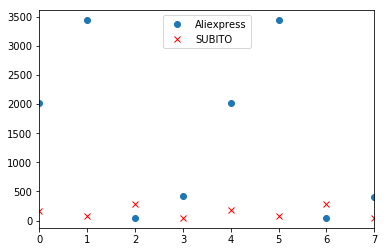

In [148]:
import numpy as np
import pandas as pd

Aliexpress=data[(data["shop"]=="Aliexpress")]["risultato"].values
SUBITO=data[(data["shop"]=="SUBITO.IT")]["risultato"].values    
print SUBITO
print Aliexpress
d = {'Aliexpress' : Aliexpress,
     'SUBITO' : SUBITO}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])